### 상품 주문 수의 추세를 분석하여 판매량 개선의 방향 찾기


고객의 소리) 
고객 정보는 전부 쇼핑몰 사이트에서 관리하고 있어 데이터는 많습니다.
지금 상황에는 이번 달 매출을 파악하는 것으로 벅찹니다.
우리 회사 쇼핑몰 사이트의 매출 확보를 위한 데이터 분석을 부탁드립니다.

전제 조건)              
                                     
주요 품목 : 컴퓨터 - 가격대별 5개의 상품                  
데이터 : 4종류의 6개의 데이터                   
                                     
customer_master.csv : 쇼핑몰 사이트의 고객 정보(회원 등록 시 입력하는 정보)             
item_master.csv : 취급하는 상품 데이터 정보(상품명, 가격 등이 포함)               
transaction_1(2).csv : 구매 내역 데이터(언제, 어느 고객이 얼마나 샀는지의 정보)                
transaction_detail_1(2).csv : 구매 내역 상세 데이터(구체적으로 어떤 상품을 몇 개 샀는지의 정보)
                     
* 1,2는 1,000개 단위 혹은 월로 분할된 데이터셋

### 데이터 정돈

In [2]:
import pandas as pd

In [3]:
customer_info = pd.read_csv('C:/Users/LGCARE/Desktop/개인/Study_DataTechniques/01. DataProcess/data/1장/customer_master.csv')
customer_info.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [3]:
item_info = pd.read_csv('./data/item_master.csv')
item_info.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv('./data/transaction_1.csv')
transaction_1.head()

transaction_2 = pd.read_csv('./data/transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [5]:
transaction_detail_1 = pd.read_csv('./data/transaction_detail_1.csv')
transaction_detail_1.head()

transaction_detail_2 = pd.read_csv('./data/transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


- 매출과 연관이 있고 가장 상세한 데이터는 매출 관련 데이터이므로 transaction_detail을 기준으로 고려

1. 분할된 데이터셋 - 세로로 결합             
2. transaction_detail을 기준으로 transaction, customer_info, item_info를 가로로 결합

In [6]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index= True) # axis = 0(o)
transaction_detail.info()

transaction = pd.concat([transaction_1, transaction_2], ignore_index= True)
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   detail_id       7144 non-null   int64 
 1   transaction_id  7144 non-null   object
 2   item_id         7144 non-null   object
 3   quantity        7144 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 223.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6786 entries, 0 to 6785
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  6786 non-null   object
 1   price           6786 non-null   int64 
 2   payment_date    6786 non-null   object
 3   customer_id     6786 non-null   object
dtypes: int64(1), object(3)
memory usage: 212.2+ KB


- transaction_detail에 부족한 데이터) transaction의 payment_date, custer_id
                                  
※ transaction의 price = transaction_detail - quantity & item_master - item_prece로 계산된 것, 중복 방지를 위해 추가하지 않음

In [7]:
trans_join_df = transaction_detail.merge(transaction[['transaction_id', 'payment_date', 'customer_id']], how= 'left', on= 'transaction_id')

print(len(transaction_detail))
print(len(transaction))
print(len(trans_join_df))

trans_join_df.head()

7144
6786
7144


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [8]:
item_join_df = trans_join_df.merge(right= item_info, on= 'item_id', how= 'left')
item_join_df

customer_join_df = item_join_df.merge(right= customer_info, how= 'left', on= 'customer_id')
customer_join_df.head()


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


In [9]:
final_df = customer_join_df.copy()
# final_df.head()

final_df['sale'] = final_df['quantity'] * final_df['item_price']
final_df[['quantity', 'item_price', 'sale']]

,quantity,item_price,sale
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000
...,...,...,...
7139,1,180000,180000
7140,1,85000,85000
7141,2,50000,100000
7142,1,85000,85000


### 데이터 검산

In [10]:
print(transaction['price'].sum())
print(final_df['sale'].sum())

transaction['price'].sum() == final_df['sale'].sum()

971135000
971135000


np.True_

### 데이터 분석

1. 결손치 파악 > 제거 / 보간
2. 전체를 파악할 수 있는 숫자감                 
> 상품 A 매출 : 10만원 vs 전체 매출 : 10억? 100만 원인지에 따라 의미 다름

In [11]:
# 결측치 파악
final_df.info()
# print(final_df.isnull()) # 값별 결측치 여부 bool로 반환
print(final_df.isnull().sum()) # 열별 결측치 합

# 전체 파악 숫자감
final_df.describe()

# price - max : 420,000 : 단가가 높은 컴퓨터 2대를 산 유저 예상
# quantity - 75% - 1 : 대부분의 고객 PC 1대를 구매

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   detail_id          7144 non-null   int64 
 1   transaction_id     7144 non-null   object
 2   item_id            7144 non-null   object
 3   quantity           7144 non-null   int64 
 4   payment_date       7144 non-null   object
 5   customer_id        7144 non-null   object
 6   item_name          7144 non-null   object
 7   item_price         7144 non-null   int64 
 8   customer_name      7144 non-null   object
 9   registration_date  7144 non-null   object
 10  email              7144 non-null   object
 11  gender             7144 non-null   object
 12  age                7144 non-null   int64 
 13  birth              7144 non-null   object
 14  pref               7144 non-null   object
 15  sale               7144 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 893.

,detail_id,quantity,item_price,age,sale
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [12]:
# 추가 파악) 전체 기간
final_df['payment_date'].min() # 2019.02.01
final_df['payment_date'].max() # 2019.07.31

'2019-07-31 23:41:38'

### 데이터 집계 -  시계열 데이터

- 현재의 경우 반년 정도의 데이터라면 별로 영향이 없겠지만,
  과거 수년의 데이터라면 여러 가지 비즈니스 모델이 포함되어 있을 수 있기 때문에 전체 데이터를 한 번에 분석하면 데이터의 시계열 변화를 잘못 파악하는 경우가 있습니다.
  그런 경우, 데이터 범위를 좁혀서 분석하는 것도 하나의 방법입니다.

- 또한, 전체적으로 매출이 늘어나고 있는지 줄어들고 있는지를 파악하는 것이 분석의 첫걸음

>> 월별로 집계

In [13]:
import datetime

In [14]:
# 구입일인 payment_date에서 연월을 추출해서 연월 단위로 price를 집계해서 표시
final_df['payment_date'] = pd.to_datetime(final_df['payment_date'])
final_df.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
item_name                    object
item_price                    int64
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
sale                          int64
dtype: object

In [15]:
# final_df.payment_date.dt.month
final_df['payment_month'] = final_df.payment_date.dt.strftime('%Y%m')
final_df[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [23]:
month_sale_sum = final_df.groupby(by= 'payment_month')['sale'].sum() # payment_month로 groupby, 'sale'열만 집계
print(month_sale_sum)

# 5월 : 매출 하락
# 6,7월 : 매출 회복
# 가장 높은 매출 : 7월

month_sale_sum.mean() # 한 달 1억 6천만 원 정도의 매출
12 * month_sale_sum.mean() # 1년 간 약 20억원 정도의 매출 기대

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: sale, dtype: int64


np.float64(1942270000.0)

>> 월별, 상품별 데이터 집계

- pd.pivot_table, df.groupby

In [20]:
final_df.groupby(['payment_month', 'item_name'])[['sale', 'quantity']].sum()

sale  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [ ]:
pd.pivot_table(data= final_df, values= ['sale', 'quantity'], index= 'item_name', columns= 'payment_month',
               aggfunc= 'sum')

# 매출 합계는 PC-E가 가장 높지만, 수량에서는 가장 싼 PC-A가 많음
# 앞의 월별 추세에서 5월에 매출이 감소하고 6,7월에 증가
# 상품별로 보면 5월은 PC-B,D의 판매량은 증가했지만, PC-E의 매출이 많이 감소한 것이 영향을 끼친 것으로 보임
# 6,7월은 PC-E의 매출이 크게 상승(판매량 대비 가격이 높기 때문문)


quantity                                         sale            \
payment_month   201902 201903 201904 201905 201906 201907    201902    201903   
item_name                                                                       
PC-A               483    520    518    497    520    505  24150000  26000000   
PC-B               297    300    276    298    282    332  25245000  25500000   
PC-C               165    159    183    171    182    162  19800000  19080000   
PC-D               173    143    135    144    160    145  31140000  25740000   
PC-E               285    305    309    280    302    341  59850000  64050000   

                                                       
payment_month    201904    201905    201906    201907  
item_name                                              
PC-A           25900000  24850000  26000000  25250000  
PC-B           23460000  25330000  23970000  28220000  
PC-C           21960000  20520000  21840000  19440000  
PC-D           24300000  25920000  28800000  26100000  
PC-E           64890000  58800000  63420000  71610000

>> 월별, 상품별 매출 추이 시각화

In [24]:
graph_df = pd.pivot_table(data= final_df, values= 'sale', index= 'payment_month', columns= 'item_name',
                          aggfunc= 'sum')
graph_df.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


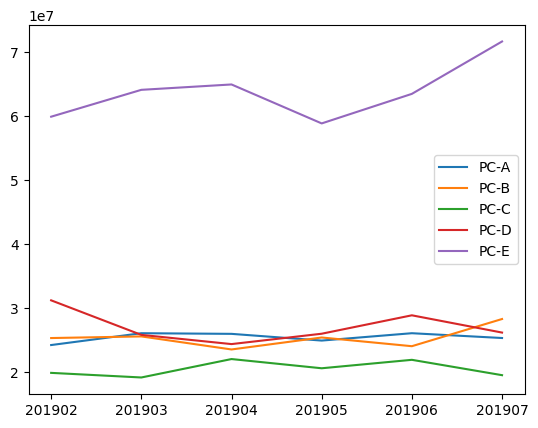

In [32]:
import matplotlib.pyplot as plt

plt.plot(graph_df.index, graph_df['PC-A'], label = 'PC-A')
plt.plot(list(graph_df.index), graph_df['PC-B'], label = 'PC-B')
plt.plot(list(graph_df.index), graph_df['PC-C'], label = 'PC-C')
plt.plot(list(graph_df.index), graph_df['PC-D'], label = 'PC-D')
plt.plot(list(graph_df.index), graph_df['PC-E'], label = 'PC-E')
plt.legend()

# matplotlib 그래프는 가로축, 세로축의 순서를 지정
# 가로축은 payment_month > graph_df.index를 리스트형으로 변환해서 지정
# 세로축은 상품별 매출 > graph_df.PC-A(각 칼럼)을 지정
# 라벨로 범례를 표시

# > PC-E가 매출을 견인하는 기종
# > 매출 추이 파악 가능